**Mobile Phone Data Analysis 數據分析專案**

## 專案簡介

   - 資料來源：Kaggle 手機產品資料

   - 主要分析方向：探索價格、規格與評價的關係

   - 預期回答的問題：

    * 哪個價格區間的評價比較好？

    * 哪些零件（CPU、RAM、電池、螢幕、相機）對 spec_score 影響最大？
    
## 資料載入與初步觀察
   
   - 使用 pandas 載入資料

   - 檢查資料筆數與欄位

   - 使用 .info()、.describe()、.head() 等函式初步檢查內容

## 資料清理與處理

   - 處理缺失值（缺失欄位與筆數）

   - 資料類型轉換

   - 建立新的欄位（如：價格區間、數值標準化等）

## 探索性資料分析

   - 整體價格、評價、spec 分數的分布

   - 哪些變數可能與評價/spec 分數高度相關

## 問題分析

   - 針對提出的問題進行分析與視覺化：

    * Q1：哪個價格區間的評價比較高？

     ** 繪製箱型圖 / 長條圖 比較平均評價

    * Q2：哪些規格（ram、battery、camera、display）對 spec_score 有明顯影響？

     ** 散佈圖觀察關係

## 使用 SQL 查詢分析

   - 建立 SQLite 資料庫並寫入 pandas 資料表

   - 使用 sqlite3 + pandas.read_sql() 查詢：

   - 不同價格區間平均評價

   - 排名前 10 高 spec_score 的手機

## 資料視覺化

   - 使用 matplotlib / seaborn 呈現分析結果

## 結論與發現

   - 總結從分析中得出的洞察

    * 中高價手機評價較好

    * RAM 和電池容量與 spec_score 高度相關


In [1]:
# 導入需要的套件
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3

# 設定顯示中文字體
plt.rcParams['font.sans-serif'] = ['Arial']

# 載入資料
df = pd.read_csv("data/raw_data.csv")

# 看前 5 筆資料
df.head()


,name,price,spec_score,user_rating,connectivity,cpu,ram,battery,display,camera,expandable,os,fm_radio,other
0,Samsung Galaxy Tab A9 Plus Tablet (5G+ 8GB RAM...,17905,76.0,4.75,NaN,"Snapdragon 695, Octa Core, 2.2 GHz Processor","8 GB RAM, 128 GB inbuilt",7040 mAh Battery with 15W Fast Charging,"11 inches, 1200 x 1920 px, 90 Hz Display",8 MP Rear & 5 MP Front Camera,"Memory Card Supported, upto 1 TB",Android v13,NaN,"3G, 4G, 5G, Wi-Fi"
1,Samsung Galaxy Tab S9 FE Plus 2023 (Wi-Fi Only...,32628,78.0,4.75,NaN,"Exynos 1380, Octa Core, 2.4 GHz Processor","8 GB RAM, 128 GB inbuilt",10090 mAh Battery with 45W Fast Charging,"12.4 inches, 1600 x 2560 px, 120 Hz Display",8 MP + 8 MP Dual Rear & 12 MP Front Camera,"Memory Card Supported, upto 1 TB",Android v13,NaN,Wi-Fi
2,Samsung Galaxy Tab S11 Ultra,129990,82.0,4.70,Single Sim,"Dimensity 9400 Plus, Octa Core Processor","12 GB RAM, 256 GB inbuilt",11800 mAh Battery with 45W Fast Charging,"14.8 inches, 1848 x 2960 px, 120 Hz Display",50 MP + 8 MP Dual Rear & 12 MP + 12 MP Dual Fr...,Memory Card Supported,NaN,NaN,"3G, 4G, 5G, Wi-Fi"
3,Samsung Galaxy Tab S9 FE,44999,84.0,4.00,Single Sim,"Exynos 1380, Octa Core, 2.4 GHz Processor","6 GB RAM, 128 GB inbuilt",8000 mAh Battery with 45W Fast Charging,"10.9 inches, 1440 x 2304 px, 90 Hz Display",8 MP Rear & 12 MP Front Camera,"Memory Card Supported, upto 1 TB",NaN,NaN,"3G, 4G, 5G, VoLTE, Wi-Fi"
4,Samsung Galaxy Tab S9 FE (Wi-Fi Only),26280,74.0,4.35,NaN,"Exynos 1380, Octa Core, 2.4 GHz Processor","6 GB RAM, 128 GB inbuilt",8000 mAh Battery with 45W Fast Charging,"10.9 inches, 1440 x 2304 px, 90 Hz Display",8 MP Rear & 12 MP Front Camera,"Memory Card Supported, upto 1 TB",Android v13,NaN,Wi-Fi


In [2]:
# 資料大小與欄位名稱
print("資料筆數與欄位數：", df.shape)
print("\n欄位名稱：", df.columns.tolist())

# 看資料類型與缺失值
df.info()

# 缺失值統計
df.isnull().sum()


資料筆數與欄位數： (1629, 14)

欄位名稱： ['name', 'price', 'spec_score', 'user_rating', 'connectivity', 'cpu', 'ram', 'battery', 'display', 'camera', 'expandable', 'os', 'fm_radio', 'other']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1629 entries, 0 to 1628
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          1629 non-null   object 
 1   price         1629 non-null   int64  
 2   spec_score    1620 non-null   float64
 3   user_rating   1622 non-null   float64
 4   connectivity  1341 non-null   object 
 5   cpu           1570 non-null   object 
 6   ram           1611 non-null   object 
 7   battery       1418 non-null   object 
 8   display       1617 non-null   object 
 9   camera        1621 non-null   object 
 10  expandable    1213 non-null   object 
 11  os            477 non-null    object 
 12  fm_radio      112 non-null    object 
 13  other         1614 non-null   object 
dtypes: float64(2), int64(1

name               0
price              0
spec_score         9
user_rating        7
connectivity     288
cpu               59
ram               18
battery          211
display           12
camera             8
expandable       416
os              1152
fm_radio        1517
other             15
dtype: int64

In [3]:
# 各欄位缺失值數量與比例
missing = df.isnull().sum()
missing_percent = (missing / len(df)) * 100
missing_summary = pd.DataFrame({'MissingCount': missing, 'MissingPercent': missing_percent})
missing_summary = missing_summary[missing_summary['MissingCount'] > 0]
missing_summary.sort_values(by='MissingPercent', ascending=False)


,MissingCount,MissingPercent
fm_radio,1517,93.124616
os,1152,70.718232
expandable,416,25.537139
connectivity,288,17.679558
battery,211,12.952732
cpu,59,3.621854
ram,18,1.104972
other,15,0.920810
display,12,0.736648
spec_score,9,0.552486


In [4]:
df.dtypes
#看看每個欄位的資料型別

name             object
price             int64
spec_score      float64
user_rating     float64
connectivity     object
cpu              object
ram              object
battery          object
display          object
camera           object
expandable       object
os               object
fm_radio         object
other            object
dtype: object

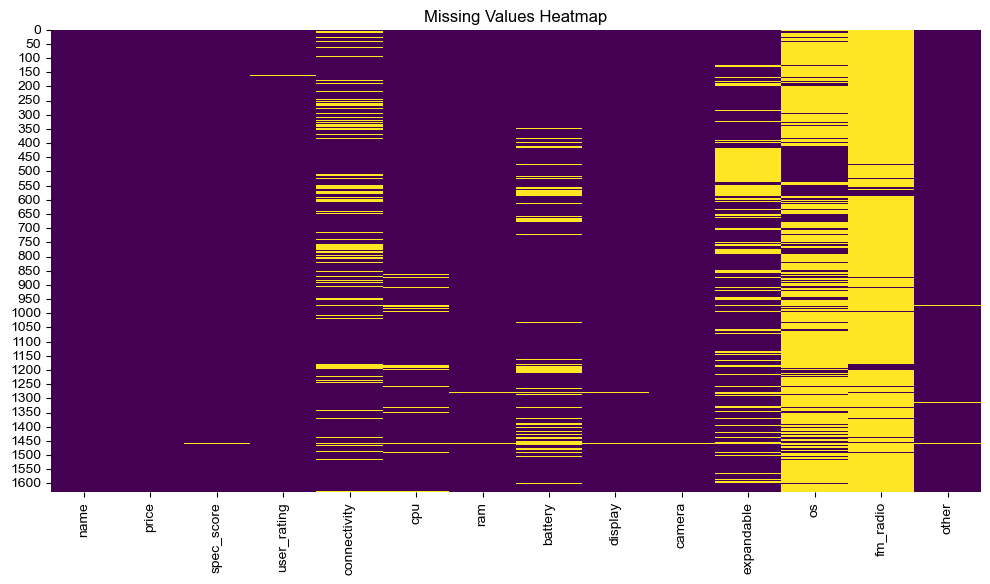

In [5]:
plt.figure(figsize=(12, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()
#畫出整份資料的缺失值分布圖（黃色代表缺值），越黃越嚴重。

In [6]:
# 1. 刪除缺失比例超過 50% 的欄位
df = df.loc[:, df.isnull().mean() < 0.5]

# 2. 數值欄缺值：補平均
num_cols = df.select_dtypes(include=['float64', 'int64']).columns
df[num_cols] = df[num_cols].fillna(df[num_cols].mean())

# 3. 類別欄缺值：補 Missing
cat_cols = df.select_dtypes(include=['object']).columns
df[cat_cols] = df[cat_cols].fillna('Missing')


In [7]:
#確認缺失值是否處理成功（看 null 數量是否為 0）
#看欄位型態是否正確（數字是 int/float，類別是 object/category）
#預覽資料內容
print("處理後的資料概況：")
print(df.info())
print("\n前幾列資料：")
print(df.head())

處理後的資料概況：
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1629 entries, 0 to 1628
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          1629 non-null   object 
 1   price         1629 non-null   int64  
 2   spec_score    1629 non-null   float64
 3   user_rating   1629 non-null   float64
 4   connectivity  1629 non-null   object 
 5   cpu           1629 non-null   object 
 6   ram           1629 non-null   object 
 7   battery       1629 non-null   object 
 8   display       1629 non-null   object 
 9   camera        1629 non-null   object 
 10  expandable    1629 non-null   object 
 11  other         1629 non-null   object 
dtypes: float64(2), int64(1), object(9)
memory usage: 152.8+ KB
None

前幾列資料：
                                                name   price  spec_score  \
0  Samsung Galaxy Tab A9 Plus Tablet (5G+ 8GB RAM...   17905        76.0   
1  Samsung Galaxy Tab S9 FE Plus 2023 (Wi-Fi Only...

In [8]:
print(df.dtypes)  # 檢查資料型別


name             object
price             int64
spec_score      float64
user_rating     float64
connectivity     object
cpu              object
ram              object
battery          object
display          object
camera           object
expandable       object
other            object
dtype: object


In [9]:
#把所有欄位名稱轉成小寫並用底線連接
df.columns = (
    df.columns.str.strip()       # 去除前後空白
              .str.lower()       # 全部變小寫
              .str.replace(' ', '_')  # 空白轉底線
              .str.replace('[^0-9a-zA-Z_]', '', regex=True)  # 去除特殊字元
)

df.columns


Index(['name', 'price', 'spec_score', 'user_rating', 'connectivity', 'cpu',
       'ram', 'battery', 'display', 'camera', 'expandable', 'other'],
      dtype='object')

In [10]:
#看看資料有沒有重複
df.duplicated().sum()

np.int64(64)

In [11]:
#去除重複值
df = df.drop_duplicates()

In [12]:
#資料的整體樣貌
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
name,1565,1564,Lenovo Tab M10 FHD Plus 2nd Gen Tablet (Wi-Fi ...,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
price,1565.0,NaN,NaN,NaN,28288.899681,34448.69731,1444.0,7000.0,14999.0,34000.0,249900.0
spec_score,1565.0,NaN,NaN,NaN,59.354178,15.696323,11.0,47.0,59.0,72.0,97.0
user_rating,1565.0,NaN,NaN,NaN,4.191107,0.456606,2.0,4.05,4.25,4.5,5.0
connectivity,1565,4,Single Sim,593,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cpu,1565,387,"Quad Core, 1.3 GHz Processor",93,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ram,1565,75,"1 GB RAM, 8 GB inbuilt",145,NaN,NaN,NaN,NaN,NaN,NaN,NaN
battery,1565,273,Missing,203,NaN,NaN,NaN,NaN,NaN,NaN,NaN
display,1565,304,"7 inches, 600 x 1024 px Display",127,NaN,NaN,NaN,NaN,NaN,NaN,NaN
camera,1565,131,5 MP Rear & 2 MP Front Camera,216,NaN,NaN,NaN,NaN,NaN,NaN,NaN


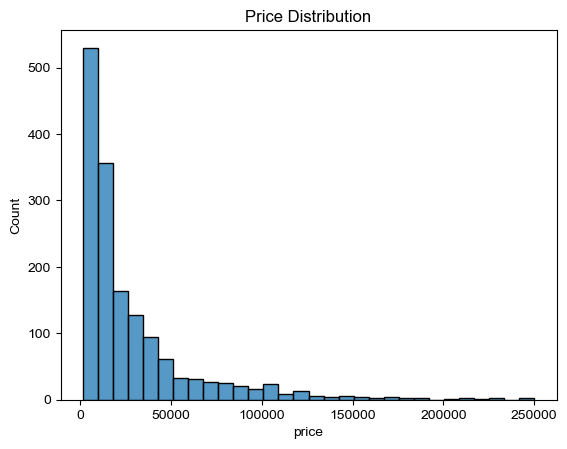

In [13]:
#價格分布狀況
sns.histplot(df['price'], bins=30)
plt.title('Price Distribution')
plt.show()

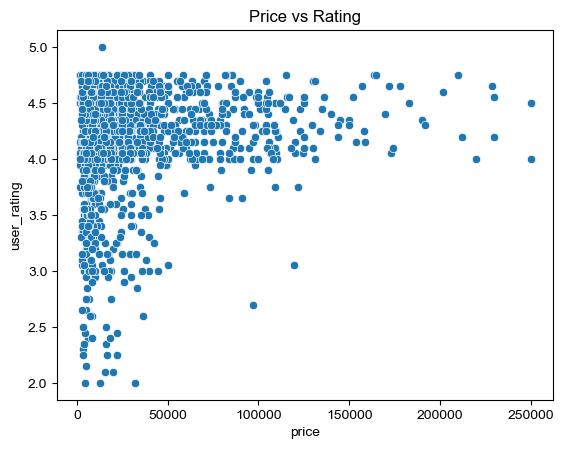

In [14]:
#價格和評分的關係
sns.scatterplot(x='price', y='user_rating', data=df)
plt.title('Price vs Rating')
plt.show()

In [15]:
#問題 1：哪個價格區間的評價比較好？

##Step A：先把價格切成區間
df['price_range'] = pd.cut(df['price'], bins=[0, 10000, 20000, 30000, 40000, 50000, df['price'].max()],
                           labels=['0-10K', '10K-20K', '20K-30K', '30K-40K', '40K-50K', '50K+'])


C:\Users\maxty\AppData\Local\Temp\ipykernel_18392\1241199894.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  price_rating = df.groupby('price_range')['user_rating'].mean().reset_index()


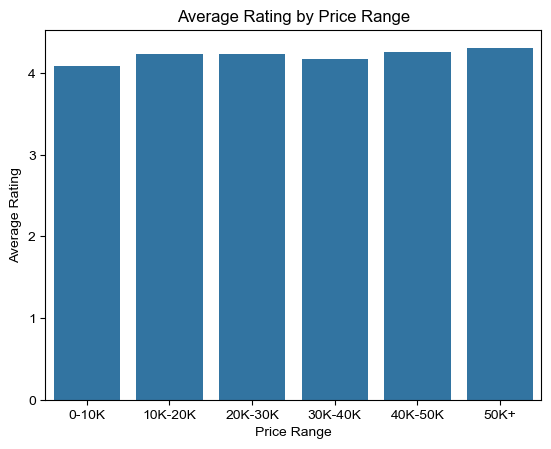

In [16]:
###Step B：每個區間的平均評分
price_rating = df.groupby('price_range')['user_rating'].mean().reset_index()

sns.barplot(x='price_range', y='user_rating', data=price_rating)
plt.title('Average Rating by Price Range')
plt.ylabel('Average Rating')
plt.xlabel('Price Range')
plt.show()


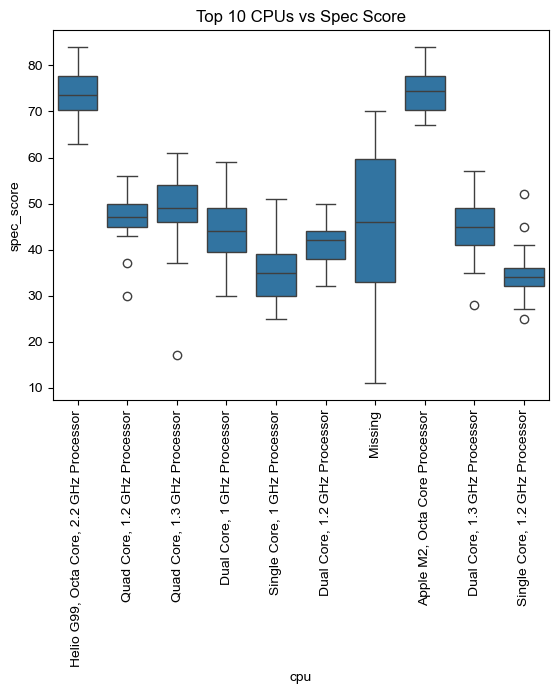

In [17]:
#CPU 對 spec_score 的影響(Top 10)
top_cpu = df['cpu'].value_counts().head(10).index
sns.boxplot(x='cpu', y='spec_score', data=df[df['cpu'].isin(top_cpu)])
plt.xticks(rotation=90)
plt.title('Top 10 CPUs vs Spec Score')
plt.show()


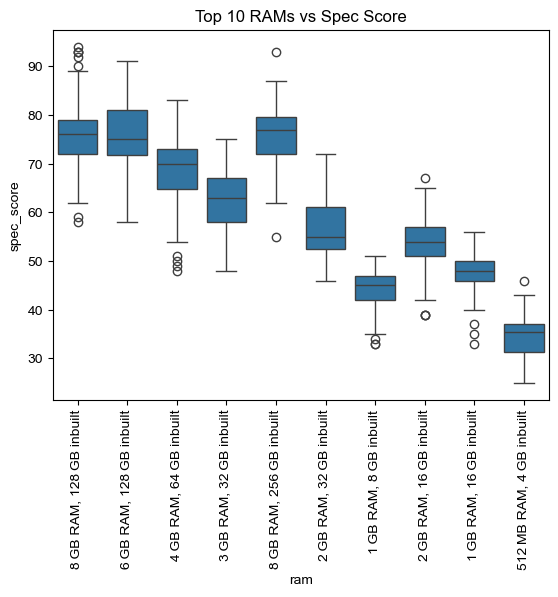

In [18]:
#RAM 對 spec_score 的影響(Top 10)
top_ram = df['ram'].value_counts().head(10).index
sns.boxplot(x='ram', y='spec_score', data=df[df['ram'].isin(top_ram)])
plt.xticks(rotation=90)
plt.title('Top 10 RAMs vs Spec Score')
plt.show()

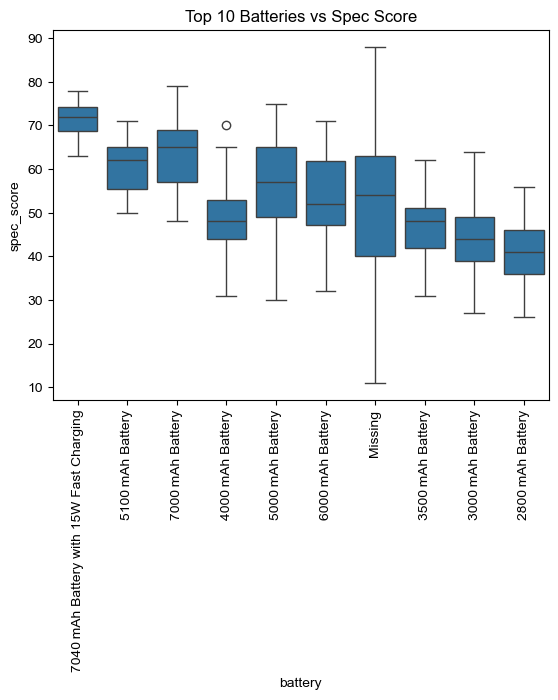

In [19]:
#Battery 對 spec_score 的影響(Top 10)
top_battery = df['battery'].value_counts().head(10).index
sns.boxplot(x='battery', y='spec_score', data=df[df['battery'].isin(top_battery)])
plt.xticks(rotation=90)
plt.title('Top 10 Batteries vs Spec Score')
plt.show()

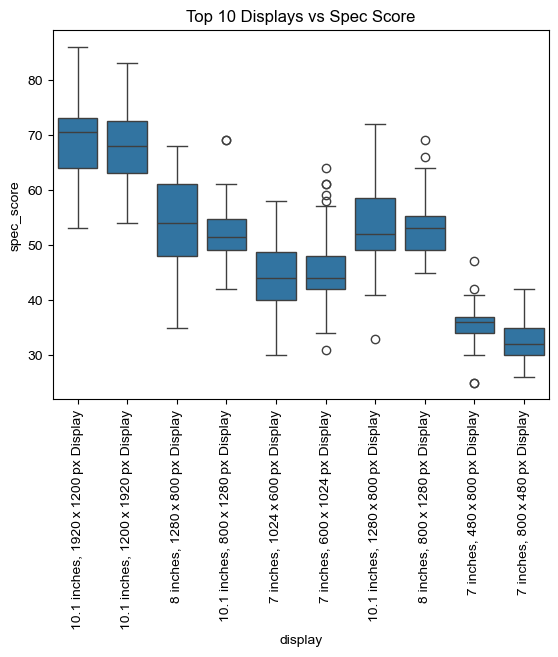

In [20]:
#Display 對 spec_score 的影響(Top 10)
top_display = df['display'].value_counts().head(10).index
sns.boxplot(x='display', y='spec_score', data=df[df['display'].isin(top_display)])
plt.xticks(rotation=90)
plt.title('Top 10 Displays vs Spec Score')
plt.show()

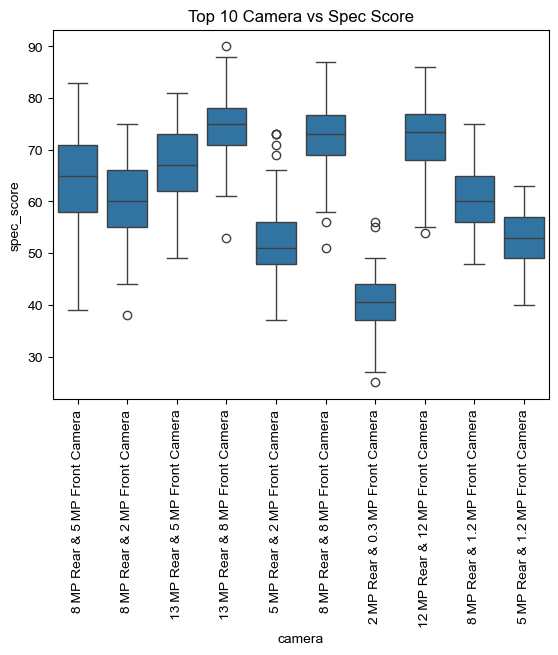

In [21]:
#Camera 對 spec_score 的影響(Top 10)
top_camera = df['camera'].value_counts().head(10).index
sns.boxplot(x='camera', y='spec_score', data=df[df['camera'].isin(top_camera)])
plt.xticks(rotation=90)
plt.title('Top 10 Camera vs Spec Score')
plt.show()

In [22]:
#建立資料庫--->存成檔案
conn = sqlite3.connect('mobile.db')  

# 將 DataFrame 寫進 SQL 資料表
df.to_sql('mobiles', conn, index=False, if_exists='replace')


1565

In [23]:
#平均評分最高的前 10 款手機
query = '''
SELECT name, user_rating
FROM mobiles
WHERE user_rating IS NOT NULL
ORDER BY user_rating DESC
LIMIT 10
'''

result = pd.read_sql_query(query, conn)
result


,name,user_rating
0,Amazon New Generation Kindle Paperwhite 3G,5.00
1,Samsung Galaxy Tab A9 Plus Tablet (5G+ 8GB RAM...,4.75
2,Samsung Galaxy Tab S9 FE Plus 2023 (Wi-Fi Only...,4.75
3,Samsung Galaxy Tab A9 Plus Tablet,4.75
4,Samsung Galaxy Tab S8 FE,4.75
5,Samsung Galaxy Tab S7 Plus,4.75
6,Samsung Galaxy Tab S8 5G Tablet,4.75
7,Samsung Galaxy Tab S 8.4 (WiFi+3G+16GB),4.75
8,Xiaomi Pad 7 (12GB RAM + 256GB),4.75
9,Xiaomi Redmi Pad SE Tablet (6GB RAM + 128GB),4.75


In [24]:
#每個品牌的平均 spec_score 與手機數量
query = '''
SELECT name, COUNT(*) AS phone_count, AVG(spec_score) AS avg_spec_score
FROM mobiles
GROUP BY name
ORDER BY avg_spec_score DESC
'''

result = pd.read_sql_query(query, conn)
result


,name,phone_count,avg_spec_score
0,Samsung Galaxy Tab S9 Ultra Tablet (5G + 12GB ...,1,97.0
1,Samsung Galaxy Tab S9 Ultra Tablet,1,95.0
2,Samsung Galaxy Tab S9 Plus,1,95.0
3,Samsung Galaxy Tab S10 Ultra Tablet 5G (12GB+5...,1,95.0
4,Samsung Galaxy Tab S10 Plus,1,95.0
...,...,...,...
1559,Croma XT1177 Tablet,1,18.0
1560,Lava Xtron Z704 Tablet,1,17.0
1561,Amazon Kindle Paperwhite Wifi eReader,1,17.0
1562,Swipe Fablet F1 (WiFi+3G+4GB),1,14.0


In [25]:
#哪些手機價格高但評價差
query = '''
SELECT name, price, user_rating
FROM mobiles
WHERE price > 30000 AND user_rating < 3
ORDER BY price DESC
'''

result = pd.read_sql_query(query, conn)
result


,name,price,user_rating
0,Microsoft Surface Pro 4 (6th Gen Ci5/ 8GB/ 256...,96890,2.70
1,Acer Iconia Tab A500-10S32u (WiFi+32GB),36382,2.60
2,Lenovo Yoga 2 10 inch Tablet (WiFi+3G+32GB),32990,2.85
3,Acer Iconia Tab 10 W500,32022,2.00


In [26]:
df['price_bin'] = pd.cut(df['price'], bins=[0, 10000, 20000, 30000, 40000, 50000, df['price'].max()],
                         labels=['0–10k', '10k–20k', '20k–30k', '30k–40k', '40k–50k', '50k+'])

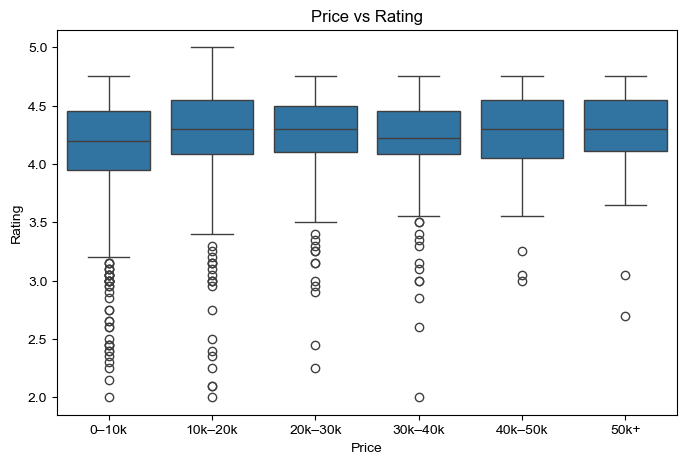

In [27]:
#哪個價格區間的評價比較好
plt.figure(figsize=(8,5))
sns.boxplot(x='price_bin', y='user_rating', data=df)
plt.title('Price vs Rating')
plt.xlabel('Price')
plt.ylabel('Rating')
plt.show()